Solve **by standard eigenvalue solvers** (either numerically or analytically) the above eigenvalue problem.
Find the two eigenvalues as function of the interaction strength $\lambda$.
Study the behavior of these eigenstates as functions of the interaction strength $\lambda$.

<>:64: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:79: SyntaxWarning: invalid escape sequence '\l'
<>:87: SyntaxWarning: invalid escape sequence '\l'
<>:64: SyntaxWarning: invalid escape sequence '\l'
<>:71: SyntaxWarning: invalid escape sequence '\l'
<>:79: SyntaxWarning: invalid escape sequence '\l'
<>:87: SyntaxWarning: invalid escape sequence '\l'
C:\Users\Markus\AppData\Local\Temp\ipykernel_113504\3899404584.py:64: SyntaxWarning: invalid escape sequence '\l'
  axs[0,0].set_xlabel('$\lambda$')
C:\Users\Markus\AppData\Local\Temp\ipykernel_113504\3899404584.py:71: SyntaxWarning: invalid escape sequence '\l'
  axs[0,1].set_xlabel('$\lambda$')
C:\Users\Markus\AppData\Local\Temp\ipykernel_113504\3899404584.py:79: SyntaxWarning: invalid escape sequence '\l'
  axs[1,0].set_xlabel('$\lambda$')
C:\Users\Markus\AppData\Local\Temp\ipykernel_113504\3899404584.py:87: SyntaxWarning: invalid escape sequence '\l'
  axs[1,1].set_xlabel('$\lambda

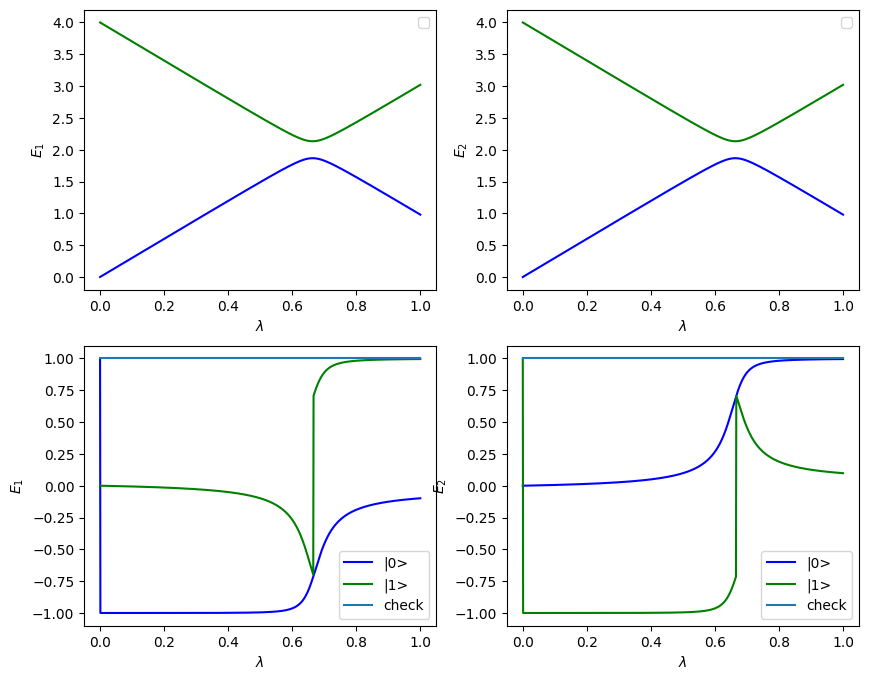

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# set variables
E1 = 0
E2 = 4
V11 =3
V22 = -V11
V12 = 0.2
V21 = V12
lamb = 0
# define constants
e = (E1+E2)/2
o = (E1-E2)/2
omegaz = (V11-V22)/2
omegax = V12
c = (V11+V22)/2
# Pauli Matrizes
sx = np.array([[0,1],[1,0]])
sy = np.array([[0,-1j],[1j,0]])
sz = np.array([[1,0],[0,-1]])
# define Hamiltonians
H_0 = e*np.identity(2) + o*sz
H_i = c*np.identity(2) + omegaz*sz + omegax*sx 
def H(x):
    return H_0 + x*H_i

# solve the eigenvalue problem
resolution = 1000
lamb = np.linspace(0,1,resolution)

eigenvalueslist = np.zeros((2,resolution))
eigenvectors1 = np.zeros((resolution,2))
eigenvectors2 = np.zeros((resolution,2))

for i in range(resolution):
    eigenvalues, eigenvectors = np.linalg.eig(H(lamb[i]))
    permute = eigenvalues.argsort()
    eigenvalues = eigenvalues[permute]
    eigenvectors = eigenvectors[:,permute]
    eigenvalueslist[0,i] = eigenvalues[0]
    eigenvalueslist[1,i] = eigenvalues[1]
    # eigenvectors

    eigenvectors1[i,0] = eigenvectors[0,0]
    eigenvectors1[i,1] = eigenvectors[0,1]
    eigenvectors2[i,0] = eigenvectors[1,0]
    eigenvectors2[i,1] = eigenvectors[1,1]



# make an 1D array that contains the components of the eigenvectors. For example 11 is component 1 of first eigenvector
component11 = eigenvectors1[:,0]
component12 = eigenvectors1[:,1]
component21 = eigenvectors2[:,0]
component22 = eigenvectors2[:,1]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot on the first subplot (axs[0])
axs[0,0].plot(lamb, eigenvalueslist[0,:], color='blue')
axs[0,0].plot(lamb, eigenvalueslist[1,:], color='green')
axs[0,0].set_xlabel('$\lambda$')
axs[0,0].set_ylabel('$E_1$')
axs[0,0].legend()

# Plot on the second subplot (axs[1])
axs[0,1].plot(lamb, eigenvalueslist[1,:], color='green')
axs[0,1].plot(lamb, eigenvalueslist[0,:], color='blue')
axs[0,1].set_xlabel('$\lambda$')
axs[0,1].set_ylabel('$E_2$')
axs[0,1].legend()

# Plot on the first subplot (axs[0])
axs[1,0].plot(lamb, component11, color='blue',label="|0>")
axs[1,0].plot(lamb, component12, color="green",label="|1>")
axs[1,0].plot(lamb, component11**2 + component12**2, label="check")
axs[1,0].set_xlabel('$\lambda$')
axs[1,0].set_ylabel('$E_1$')
axs[1,0].legend()

# Plot on the second subplot (axs[1])
axs[1,1].plot(lamb, component21, color='blue',label="|0>")
axs[1,1].plot(lamb, component22, color="green", label="|1>")
axs[1,1].plot(lamb, component21**2 + component22**2,label="check")
axs[1,1].set_xlabel('$\lambda$')
axs[1,1].set_ylabel('$E_2$')
axs[1,1].legend()